### Lab8 : EM Algorithm vs K Means Clustering Algorithm
### Shikha N
### 1BM18CS149

In [10]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
import sklearn.metrics as sm
import pandas as pd
import numpy as np
from sklearn import preprocessing

K Means Clustering Algorithm

     Sepal_Length  Sepal_Width  Petal_Length  Petal_Width
31            5.4          3.4           1.5          0.4
141           6.9          3.1           5.1          2.3
16            5.4          3.9           1.3          0.4
57            4.9          2.4           3.3          1.0
34            4.9          3.1           1.5          0.2
62            6.0          2.2           4.0          1.0
137           6.4          3.1           5.5          1.8
12            4.8          3.0           1.4          0.1
111           6.4          2.7           5.3          1.9
30            4.8          3.1           1.6          0.2
The accuracy score of K-Mean:  0.8933333333333333


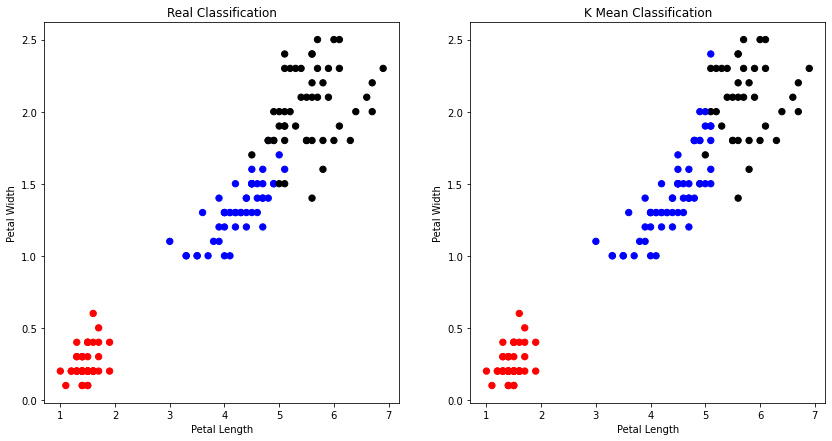

In [11]:
iris = datasets.load_iris()

X = pd.DataFrame(iris.data)
X.columns = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']
print(X.sample(10))
y = pd.DataFrame(iris.target)
y.columns = ['Targets']

model = KMeans(n_clusters=3)
model.fit(X)


plt.figure(figsize=(14,7))

colormap = np.array(['red', 'blue', 'black','magenta'])

plt.subplot(1, 2, 1)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[y.Targets], s=40)
plt.title('Real Classification')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

plt.subplot(1, 2, 2)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[model.labels_], s=40)
plt.title('K Mean Classification')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
print('The accuracy score of K-Mean: ',sm.accuracy_score(y, model.labels_))


EM Algorithm

     Sepal_Length  Sepal_Width  Petal_Length  Petal_Width
121     -0.294842    -0.592373      0.649083     1.053935
75       0.916837    -0.131979      0.364896     0.264142
149      0.068662    -0.131979      0.762758     0.790671
44      -0.900681     1.709595     -1.056039    -1.052180
126      0.432165    -0.592373      0.592246     0.790671
71       0.310998    -0.592373      0.137547     0.132510
140      1.038005     0.098217      1.046945     1.580464
15      -0.173674     3.090775     -1.283389    -1.052180
144      1.038005     0.558611      1.103783     1.712096
127      0.310998    -0.131979      0.649083     0.790671
The accuracy score of EM:  0.36666666666666664


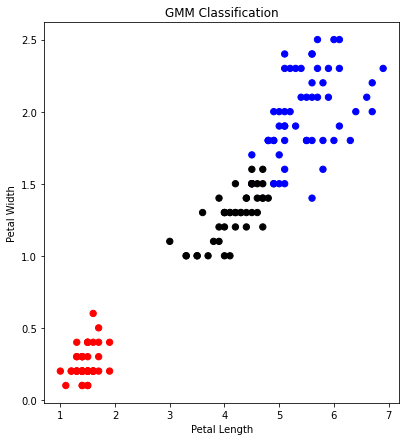

In [13]:
scaler = preprocessing.StandardScaler()
scaler.fit(X)
xsa = scaler.transform(X)
xs = pd.DataFrame(xsa, columns = X.columns)
print(xs.sample(10))
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3)
gmm.fit(xs)

y_gmm = gmm.predict(xs)

plt.figure(figsize=(14,7))
plt.subplot(1,2,2)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[y_gmm], s=40)
plt.title('GMM Classification')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

print('The accuracy score of EM: ',sm.accuracy_score(y, y_gmm))